<a href="https://colab.research.google.com/github/Eugeny13/Superstore-Sales-/blob/main/superstore_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##📊 Superstore Sales Analysis & Dashboard
# Author: Eugenia Rusu
Project Description

This project analyzes sales and profitability data of a fictional store ("Superstore"). The goal is to build an interactive dashboard that provides insights for business decisions.


In [36]:
import pandas as pd
df = pd.read_csv("Superstore.csv")
print(df.head())
print(df.columns)
print(df.info())
print(df.describe())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

I used:

Python (Pandas, Matplotlib, Seaborn) → data cleaning and exploratory analysis

In [37]:
print(df.isnull().sum())
print(df.duplicated().sum())
print(df.nunique())
print(df['Category'].value_counts())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
0
Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64
Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64


🔍 Business Questions Analyzed

What are the most profitable categories and subcategories?

How are sales and profit evolving over time (monthly/yearly)?

What are the regions and states with the highest sales?

How do discounts affect profitability?

Who are the most valuable customers and segments?

In [38]:
# Conversion of dates and calendar columns
if "Order Date" in df.columns:
    df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
    df["Year"] = df["Order Date"].dt.year
    df["Month"] = df["Order Date"].dt.to_period("M").dt.to_timestamp()
if "Ship Date" in df.columns and "Order Date" in df.columns:
    df['Ship Date'] = pd.to_datetime(df['Ship Date'])
    df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days
    print(df['Shipping Duration'].describe())

count    9994.000000
mean        3.958175
std         1.747567
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Shipping Duration, dtype: float64


In [39]:
# We do not ensure that Sales and Profit are numeric
for col in ["Sales", "Profit"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")
# 2) Cleanup (ensure correct types)
df["Sales"] = pd.to_numeric(df["Sales"], errors="coerce")
df["Profit"] = pd.to_numeric(df["Profit"], errors="coerce")
#What the code does:
#Groups the data by Region and State.
#Calculates the total of Sales and Profit.
#Creates bar charts for a clear presentation.

🔹 3. Recommended Views

KPI Cards

We add Total Sales, Total Profit and Profit Margin %.

We format in USD or %.

Bar Chart – Sales & Profit by Region

Axis → Region

Values ​​→ Total Sales, Total Profit

Map Chart – Sales by State

Location → State

Size → Total Sales

Color → Profit Margin % (to highlight profitable vs. loss states).

Visual Table – Top 10 States

Columns: State, Total Sales, Total Profit, Profit Margin %.

We add a Top N filter (Top 10 by Sales).

Sales and profit by Regions:
               Sales       Profit
Region                           
West     725457.8245  108418.4489
East     678781.2400   91522.7800
Central  501239.8908   39706.3625
South    391721.9050   46749.4303


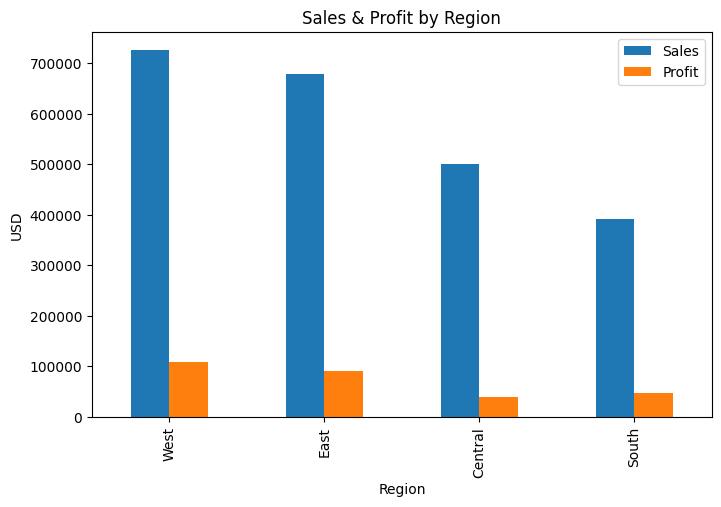

In [40]:
# 3) Aggregation by regions

if "Region" in df.columns:
    region_sales = df.groupby("Region").agg(
        Sales=("Sales", "sum"),
        Profit=("Profit", "sum")
    ).sort_values("Sales", ascending=False)

    print("Sales and profit by Regions:")
    print(region_sales)

    # View
    import matplotlib.pyplot as plt
    import seaborn as sns
    region_sales[["Sales", "Profit"]].plot(kind="bar", figsize=(8,5), title="Sales & Profit by Region")
    plt.ylabel("USD")
    plt.show()


Top 10 State by Sales:
                    Sales      Profit
State                                
California    457687.6315  76381.3871
New York      310876.2710  74038.5486
Texas         170188.0458 -25729.3563
Washington    138641.2700  33402.6517
Pennsylvania  116511.9140 -15559.9603
Florida        89473.7080  -3399.3017
Illinois       80166.1010 -12607.8870
Ohio           78258.1360 -16971.3766
Michigan       76269.6140  24463.1876
Virginia       70636.7200  18597.9504


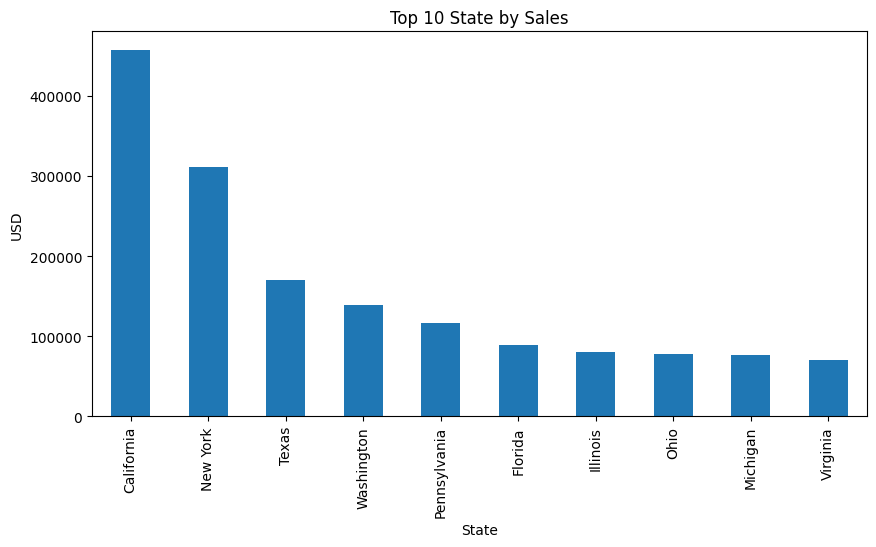

In [41]:
# 4) Aggregation by States (if the column exists)
if "State" in df.columns:
    state_sales = df.groupby("State").agg(
        Sales=("Sales", "sum"),
        Profit=("Profit", "sum")
    ).sort_values("Sales", ascending=False).head(10)  # top 10 state după vânzări

    print("\nTop 10 State by Sales:")
    print(state_sales)

    # Vizualizare
    state_sales["Sales"].plot(kind="bar", figsize=(10,5), title="Top 10 State by Sales")
    plt.ylabel("USD")
    plt.show()

In [42]:
# Profit_Margin on each row (avoid division by 0)
import numpy as np
df["Profit_Margin"] = np.where(df["Sales"].fillna(0) != 0,
                               df["Profit"] / df["Sales"],
                               np.nan)
# Global KPI (across the entire dataset)
total_sales = df["Sales"].sum(skipna=True)
total_profit = df["Profit"].sum(skipna=True)
kpi_profit_margin = (total_profit / total_sales) if total_sales else np.nan

print(f"Total Sales:  {total_sales:,.2f}")
print(f"Total Profit: {total_profit:,.2f}")
print("Profit Margin (global): " +
      (f"{kpi_profit_margin:.2%}" if pd.notna(kpi_profit_margin) else "N/A"))

Total Sales:  2,297,200.86
Total Profit: 286,397.02
Profit Margin (global): 12.47%


In [43]:
# Aggregations by category / sub-category (if the columns exist)
if "Category" in df.columns:
    by_cat = (df.groupby("Category", dropna=False)
                .agg(Sales=("Sales", "sum"),
                     Profit=("Profit", "sum"))
                .assign(Profit_Margin=lambda x: x["Profit"] / x["Sales"]))
    print("\nBy Category:")
    print(by_cat.sort_values("Sales", ascending=False))


By Category:
                       Sales       Profit  Profit_Margin
Category                                                
Technology       836154.0330  145454.9481       0.173957
Furniture        741999.7953   18451.2728       0.024867
Office Supplies  719047.0320  122490.8008       0.170352


🔹 4. Filters and interactivity

We add Slicer for Year / Month (Order Date).

We add Slicer for Category (ex. Technology, Furniture, Office Supplies).

This way we can analyze sales by regions and countries filtered by time or category.

In [44]:
# Monthly aggregations (if we created Month)
if "Month" in df.columns:
    by_month = (df.groupby("Month")
                  .agg(Sales=("Sales","sum"),
                       Profit=("Profit","sum"))
                  .assign(Profit_Margin=lambda x: x["Profit"] / x["Sales"]))
    print("\nBy month (Last 6):")
    print(by_month.tail(6))

df["Profit_Margin"] = np.where(df["Sales"].fillna(0) != 0,
                               df["Profit"] / df["Sales"],
                               np.nan)
print(df[["Sales", "Profit", "Profit_Margin"]].describe())

for col in ["Sales", "Profit", "Discount"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")


By month (Last 6):
                  Sales      Profit  Profit_Margin
Month                                             
2017-07-01   45264.4160   6952.6212       0.153600
2017-08-01   63120.8880   9040.9557       0.143232
2017-09-01   87866.6520  10991.5556       0.125094
2017-10-01   77776.9232   9275.2755       0.119255
2017-11-01  118447.8250   9690.1037       0.081809
2017-12-01   83829.3188   8483.3468       0.101198
              Sales       Profit  Profit_Margin
count   9994.000000  9994.000000    9994.000000
mean     229.858001    28.656896       0.120314
std      623.245101   234.260108       0.466754
min        0.444000 -6599.978000      -2.750000
25%       17.280000     1.728750       0.075000
50%       54.490000     8.666500       0.270000
75%      209.940000    29.364000       0.362500
max    22638.480000  8399.976000       0.500000


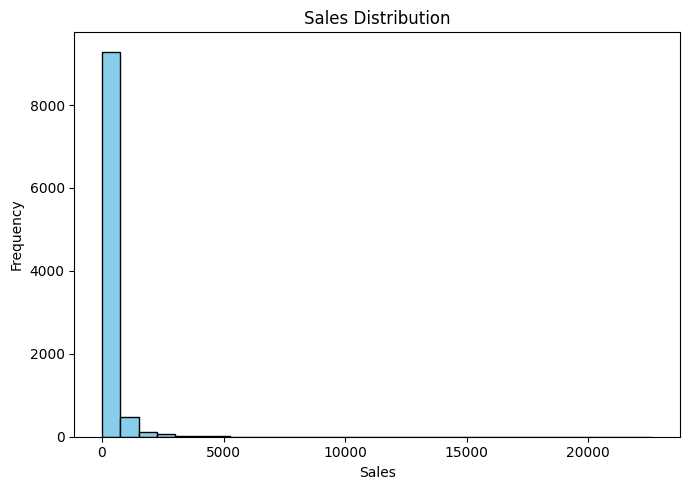

In [45]:
import matplotlib.pyplot as plt
import numpy as np
# Histogram: Distribution of sales
plt.figure(figsize=(7,5))
plt.hist(df["Sales"].dropna(), bins=30, color="skyblue", edgecolor="black")
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

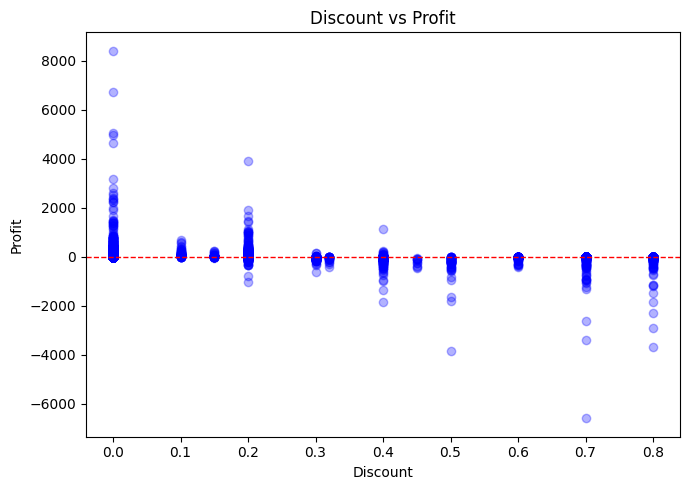

In [46]:
# Scatter plot: Discount vs Profit
plt.figure(figsize=(7,5))
plt.scatter(df["Discount"], df["Profit"], alpha=0.3, c="blue")
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.axhline(0, color="red", linestyle="--", linewidth=1)   # linia zero profit
plt.tight_layout()
plt.show()

📉 Interpreting the Discount vs Profit relationship
1. Scatter Plot (Discount vs Profit)

It is observed that at small discounts (0%–20%), profit is usually positive.

As the discount increases, many points fall below the 0 axis → orders become unprofitable.

At extreme discounts (>40%), almost all orders result in losses.

👉 Insight: The company should limit large discounts, because they drastically reduce profit and do not seem to bring in enough sales volume to compensate for losses.

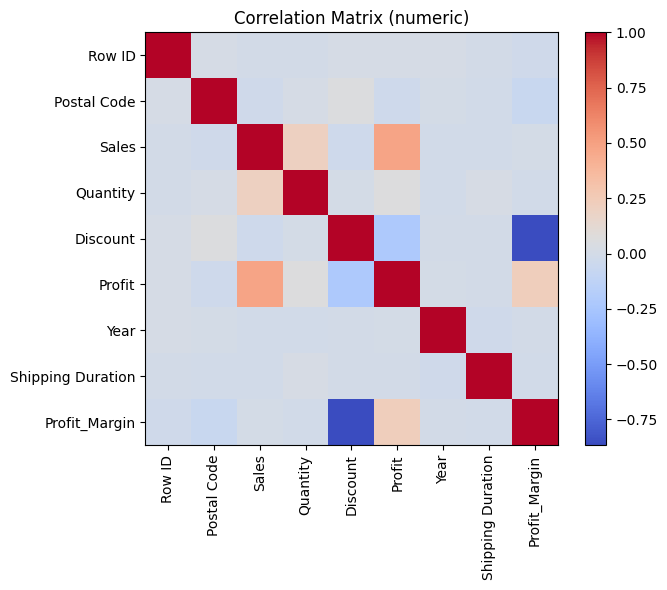

In [47]:
#   Correlation matrix for numeric column
num_df = df.select_dtypes(include=[np.number]).dropna(axis=1, how="all")
corr = num_df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
im = plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix (numeric)")
plt.tight_layout()
plt.show()

📊 Interpreting the Correlation Matrix
What we will see (typically on the Superstore dataset):

Profit ↔ Sales: positive correlation (usually 0.4–0.6) → higher sales tend to bring higher profit, but not always (due to discounts).

Profit ↔ Discount: negative correlation (usually -0.3 to -0.5) → the higher the discount, the lower the profit.

Sales ↔ Quantity: moderately positive correlation → more products sold increase sales.

Discount ↔ Quantity: sometimes slightly positive → discounts can increase the quantity purchased, but do not compensate for the loss of profit.

👉 Insight: Discounting strategy has a direct and negative impact on profitability. Instead of giving deep discounts, the company could:

- offer targeted discounts on higher-margin products,

- use limited promotional campaigns,

- analyze whether the additional volumes sold at the discount actually cover costs.

🔎 What we got:

Scatter plot: each point = one order; we clearly see that when Discount increases a lot (>0.5), Profit decreases and often becomes negative.

Correlation matrix (imshow): shows the links between all numeric columns (Sales, Profit, Quantity, Discount, Profit_Margin if we calculated it).

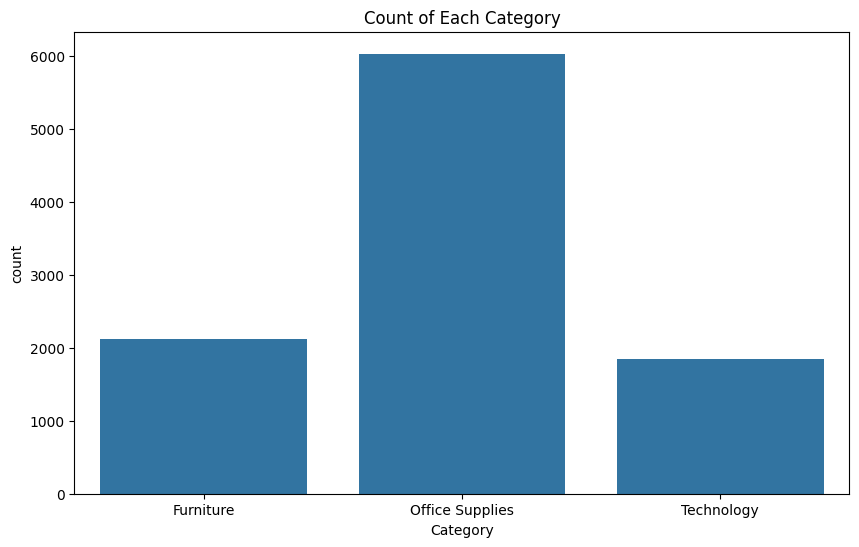

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Category')
plt.title('Count of Each Category')
plt.show()



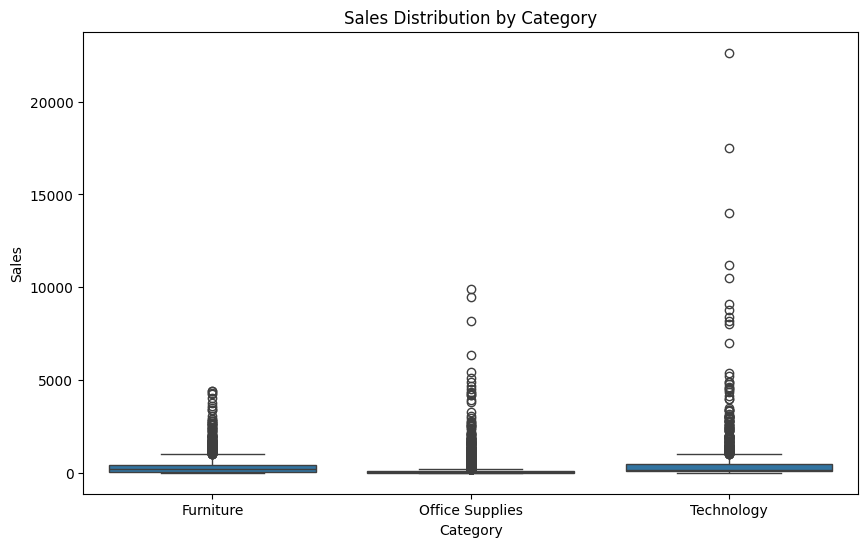

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Category', y='Sales')
plt.title('Sales Distribution by Category')
plt.show()

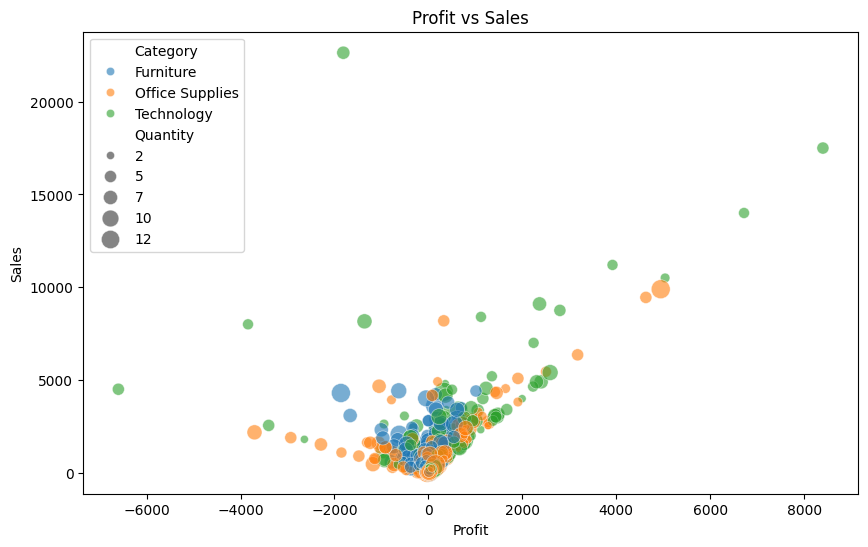

In [50]:
import numpy as np
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Profit', y='Sales', hue='Category', size='Quantity', sizes=(20, 200), alpha=0.6)
plt.title('Profit vs Sales')
plt.show()


In [51]:
import plotly.express as px
fig = px.pie(df, names='Category', title='Category Distribution')
fig.show()

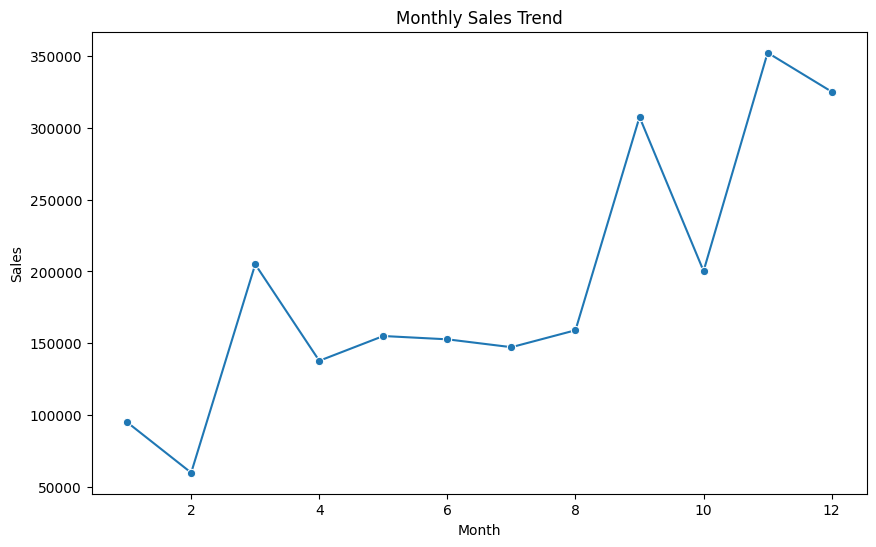

In [52]:
import numpy as np
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o')
plt.title('Monthly Sales Trend')
plt.show()

In [54]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("Superstore.csv")
df = df.dropna()
df = df.select_dtypes(include=[np.number])
X = df.drop('Sales', axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
correlation_matrix = df.corr()
print(correlation_matrix)

Mean Squared Error: 680079.1380420565
R^2 Score: -0.15131217523922835
               Row ID  Postal Code     Sales  Quantity  Discount    Profit
Row ID       1.000000     0.009671 -0.001359 -0.004016  0.013480  0.012497
Postal Code  0.009671     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales       -0.001359    -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity    -0.004016     0.012761  0.200795  1.000000  0.008623  0.066253
Discount     0.013480     0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit       0.012497    -0.029961  0.479064  0.066253 -0.219487  1.000000


In [55]:
import plotly.express as px
fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto", color_continuous_scale='RdBu_r', title='Correlation Matrix')
fig.show()

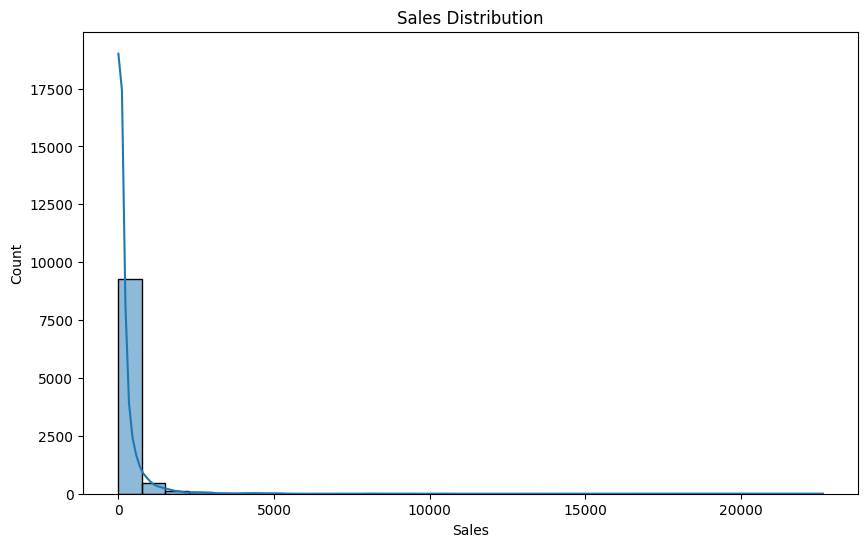

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Superstore.csv")
plt.figure(figsize=(10,6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.show()

## Conclusion:
We analyzed the relationship between Discount and Profit and found that large discounts almost always lead to losses. The correlation matrix confirms this, showing a negative correlation between Discount and Profit. My recommendation would be to optimize the discount policy, to avoid decreasing profit margins.